In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Matplotlib inline para visualizar los gráficos de Matplotlib
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'

In [3]:
# Configuración para setear y que todas las fig de Seaborn salgan por defecto con este tamaño
# Se puede especificar el tamaño de cada figura
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [4]:
df=pd.read_csv("measurementsclean.csv") #cargamos el csv.

In [5]:
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [6]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun
0,28.0,5.0,26,21.934911,12,Unknown,E10,0,0,0
1,12.0,4.2,30,21.934911,13,Unknown,E10,0,0,0
2,11.2,5.5,38,21.934911,15,Unknown,E10,0,0,0
3,12.9,3.9,36,21.934911,14,Unknown,E10,0,0,0
4,18.5,4.5,46,21.934911,15,Unknown,E10,0,0,0


In [7]:
df["gas_type"].unique()

array(['E10', 'SP98'], dtype=object)

### Comparamos la velocidad media que alcanza cada combustible:

In [8]:
df2 = df.groupby("gas_type").agg({"speed": "mean"})

In [9]:
df3=df2.reset_index()

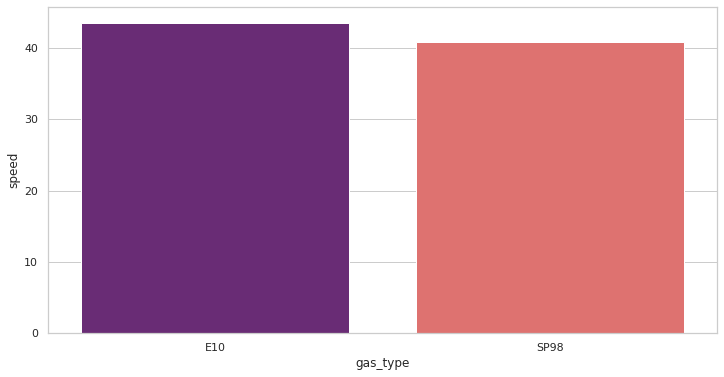

In [10]:
barplot = sns.barplot(x="gas_type", y="speed", data=df3,ci="sd", palette="magma");

In [12]:
df_dist = df.groupby("gas_type").agg({"distance": "mean"})

In [13]:
df_dist

,distance
gas_type,
E10,21.096250
SP98,18.639912


### Relación entre la velocidad y el consumo para ambos combustibles:

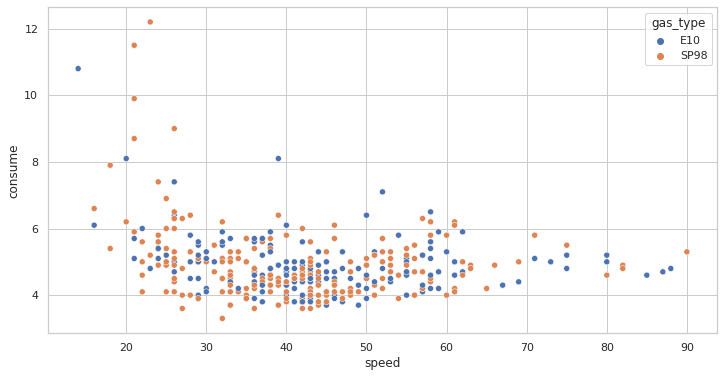

In [14]:
sns.scatterplot(x="speed", y="consume", hue="gas_type",data=df);

### Estudio la correlación entre las diferentes variables:

In [28]:
E10=df.loc[(df["gas_type"]=="E10")]

In [29]:
corrE10 = E10.corr()

In [30]:
corrE10

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
distance,1.000000,-0.172572,0.633082,0.137061,0.158903,0.045776,-0.073315,0.027364
consume,-0.172572,1.000000,-0.233318,-0.040842,-0.322918,0.043591,0.248199,-0.160503
speed,0.633082,-0.233318,1.000000,-0.014835,0.091093,0.125102,-0.001633,0.128376
temp_inside,0.137061,-0.040842,-0.014835,1.000000,0.386506,0.428083,0.091396,0.171009
temp_outside,0.158903,-0.322918,0.091093,0.386506,1.000000,0.048762,-0.097756,0.236743
AC,0.045776,0.043591,0.125102,0.428083,0.048762,1.000000,0.336123,0.171118
rain,-0.073315,0.248199,-0.001633,0.091396,-0.097756,0.336123,1.000000,-0.094916
sun,0.027364,-0.160503,0.128376,0.171009,0.236743,0.171118,-0.094916,1.000000


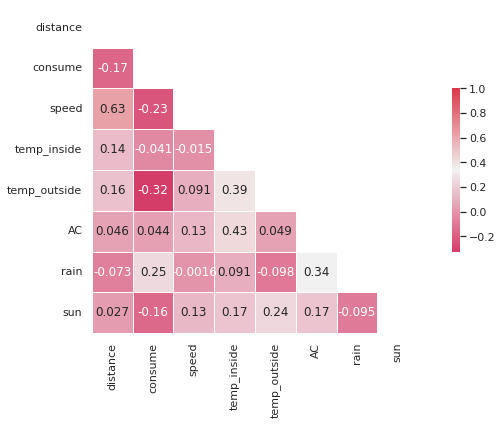

In [31]:
mascara = np.triu(np.ones_like(corr, dtype=bool)) 
color_map = sns.diverging_palette(0, 10, as_cmap=True) 
sns.heatmap(corrE10,  
            mask = mascara,
            cmap=color_map,
            square=True, 
            linewidth=0.5,
            vmax=1,
            cbar_kws={"shrink": .5},
            annot=True);

In [36]:
SP98=df.loc[(df["gas_type"]=="SP98")]

In [39]:
corrSP98 = SP98.corr()

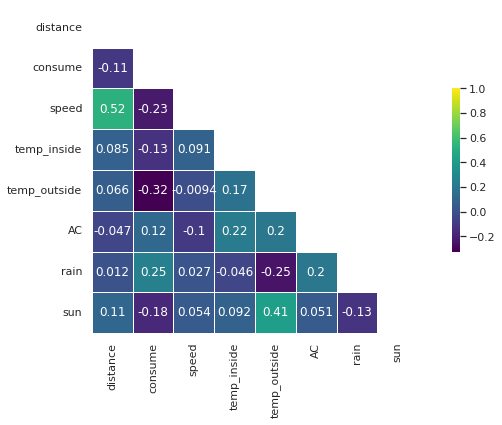

In [42]:
mascara = np.triu(np.ones_like(corr, dtype=bool)) 
color_map = sns.diverging_palette(0, 10, as_cmap=True) 
sns.heatmap(corrSP98,  
            mask = mascara,
            cmap="viridis",
            square=True, 
            linewidth=0.5,
            vmax=1,
            cbar_kws={"shrink": .5},
            annot=True);

### Mostramos la distribución de la variable consumo para cada tipo de carburantes:

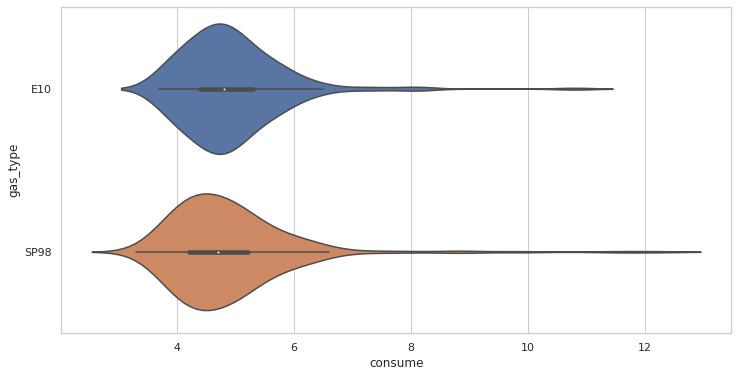

In [47]:
sns.violinplot(x=df.consume,y=df["gas_type"]);